In [17]:
# Mall_Customers.csv 파일 불러오기
import pandas as pd
df_mall = pd.read_csv('Mall_Customers.csv')
df_mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [18]:
# 데이터 구조 확인_info
data_info = df_mall.info()

# 칼럼 수 : 총 5개
# 결측값 없음을 알 수 있음
# 데이터 타입이 int와 object가 있는 것을 알 수 있음


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
# 데이터 구조 확인_nulls
data_nulls = df_mall.isnull().sum()
data_nulls

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

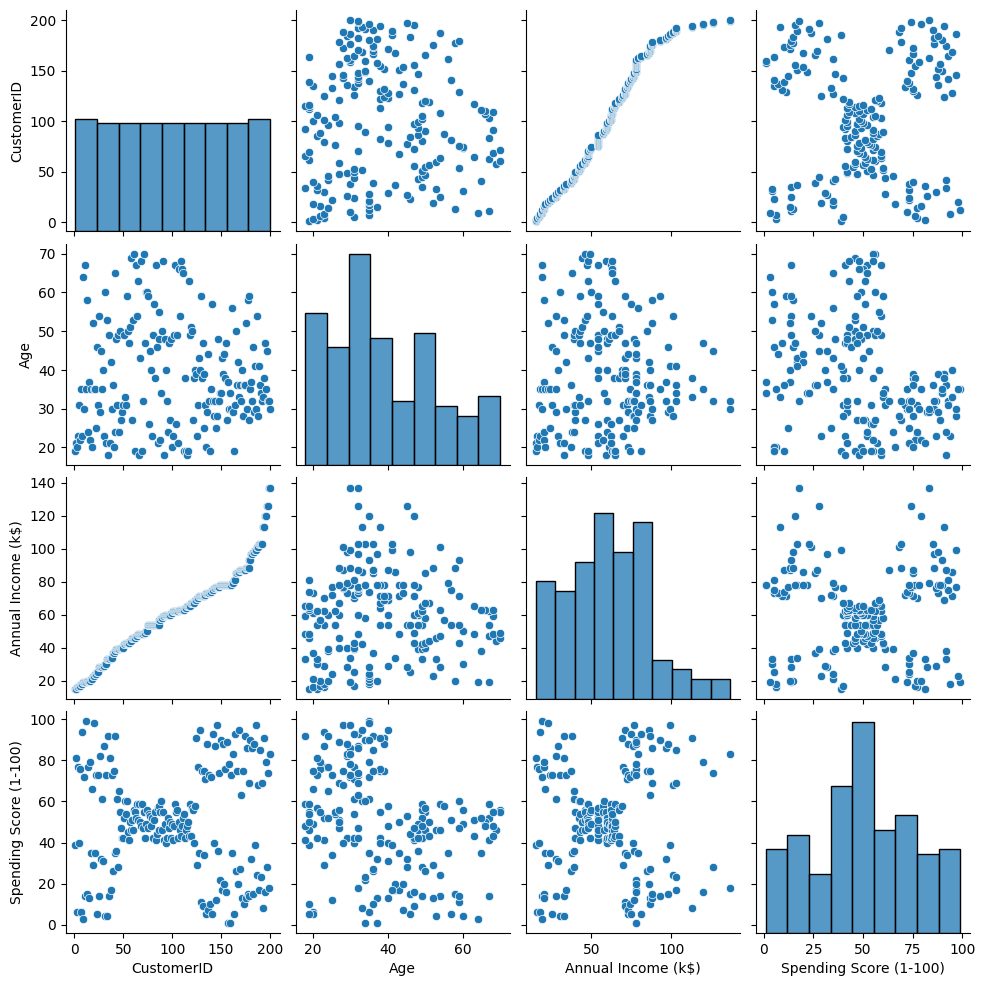

In [29]:
# pairplot 그래프로 연관관계 확인하기
## x축과 y축이 같을 때는 막대 그래프로 표기된다는 것도 알 수 있음
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df_mall)


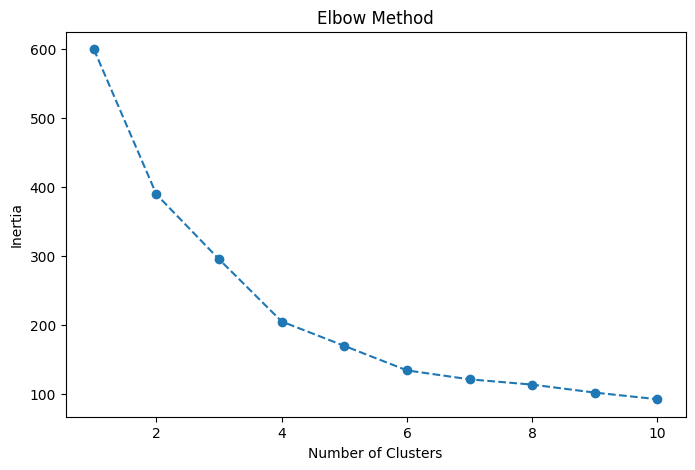

In [50]:
# 스케일링_K-means_엘보우
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 수치값으로 입력된 칼럼 모으기_나이, 연간 소득, 소비 점수
numerical_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df_mall[numerical_columns]

# StandardScaler를 써서 데이터 확장하기
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 엘보우 방법을 사용하여 최적의 K값 탐색
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 엘보우 메소드 생성하기
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


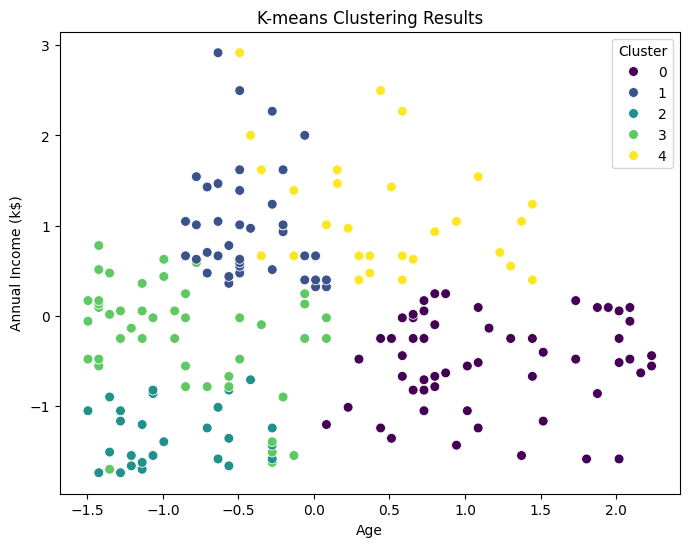

In [56]:
# 엘보우를 봤을 때 X축이 5일 때가 엘보우로 보여서 클러스터를 5로 설정
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# K-means 클러스팅 결과를 통해서 2D로 시각화 하기
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis', s=50)
plt.title('K-means Clustering Results')
plt.xlabel(numerical_columns[0])
plt.ylabel(numerical_columns[1])
plt.legend(title='Cluster')
plt.show()